# 프로젝트 : 나랑 닮은 연예인을 찾아보자

## Step1. 사진 모으기
---
__1. 사진 찍기__

* 같은 사람 사진을 2장 이상 준비.
* 사진들끼리의 얼굴 임베딩 벡터 거리를 구해보자. 닮았음을 확인할 수 있는 좋은 베이스라인이 된다.
* 혹시 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해 보자.

__2. 비교할 연예인 사진 모으기__

* 많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아진다.
* 주위의 동료들과 모은 사진을 주고받는 것도 하나의 방법이다.

## Step2. 얼굴 영역 자르기
---
임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 한. 위 Step1.에서 찾은 이미지들을 이전에 만들었던 `get_gropped_face(image_file)`을 통해서 자르자! 자른 이미지는 PIL의 `Image.fromarray`를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는 데 도움이 된다.

### 사진 자르기
샘플 이미지의 *남주혁.jpg*를 불러온 후 얼굴을 `face_recognition.face_locations`를 사용해 찾아준다. 그렇게 박스를 찾게 되면 임베딩 추출을 할 이미지를 만들기 위해서 자른다.

[(260, 765, 528, 498)]


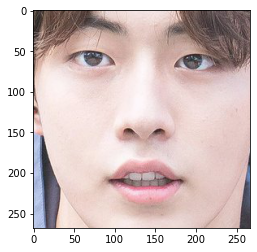

In [1]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/celebrity/남주혁.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

얼굴 이미지만 정확하게 가져왔다. 굿굿~ <br>
여러명의 유명인 사진을 `celebrity` 디렉토리에 저장했다. 이미지 파일 경로를 파라미터로 넘기면 얼굴 영역만 잘라서 뿌려주는 함수를 하나 만들어 두면 앞으로도 유용하게 사용할 수 있을 것 같다. 한번 만들어 보자.

In [2]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    if len(face_locations) == 0 : return []
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

함수가 잘 작동되는지, 이번에는 `진.jpg`의 얼굴 영역을 가져와 보자.

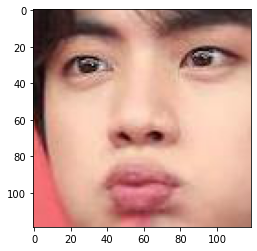

In [3]:
image_path = os.getenv('HOME')+'/aiffel/celebrity/진.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

In [4]:
from PIL import Image

face = get_gropped_face(image_path)
pillow_image = Image.fromarray(face)
pillow_image.save(image_path)

## Step3. 얼굴 영역의 임베딩 추출하기
---
이제 얼굴 영역으로 잘린 이미지들이 여럿 생겼다. 그 이미지를 `face_recognition` 을 사용해서 이미지를 불러오고 임베딩을 추출해 보자.

* `def get_face_embedding(face)` : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
* `def get_face_embedding_dict(dir_path)` : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

celebrity 디렉토리에 어떤 이미지 파일들을 다운받았는지 확인해보자.

In [5]:
dir_path = os.getenv('HOME')+'/aiffel/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['김구라.jpg', '첸.jpg', '박신양.png', '백현.jpg', '레인보우재경.jpg', '하정우.jpg', '대도서관.jpeg', '윤도현.png', '황병국.jpg', '정우성.jpeg', '태양.jpeg', '조원희.jpg', '철면수심.jpg', '트와이스미나.jpg', '존 파브르.jpeg', '드웨인 존슨.jpg', '문별.jpg', '강민경.jpg', '이효리.jpg', '신동엽.jpg', '잇섭.png', '나인뮤지스경리.jpg', '크리스 햄스워스.jpg', '박해일.jpeg', '박휘순.jpg', '제프리 힌턴.jpg', '채연.jpg', '지코.jpg', '최무성.jpg', '배성우.png', '성시경.jpg', '전소미.jpg', '박진영.jpeg', '이연걸.jpeg', '슬리피.jpg', '서장훈.jpg', '옥냥이.jpeg', '이대형.jpg', '잇지유나.jpg', '디오.jpeg', '강동원.jpg', '유리.jpg', '목진화.png', '아놀드 슈워제네거.jpg', '차명석.jpg', '우기.jpg', '리암 니슨.png', '정국.jpg', '화사.jpg', '장원영.jpeg', '하현우.jpg', '진.jpg', '길.jpg', '한기범.jpg', '피어스 브로스넌.jpg', '이진호.jpeg', '손흥민.jpg', '조인성.jpg', '이광수.jpg', '정형돈.jpg', '박항서.jpg', '로제.jpg', '박진영.jpg', '이대호.jpeg', '김희철.jpg', '다니엘 크레이그.jpeg', '박찬욱.jpeg', '배성재.jpg', '유희열.jpeg', '잇지예지.jpeg', '이희준.jpg', '로저 무어.jpeg', '크리스 에반스.jpg', '뷔.png', '김상호.png', '도아.jpeg', '김광현.jpg', '클린트 이스트우드.jpg', '유해진.jpg', '이재용.jpg', '아이즈원민주.jpg', '김대명.jpeg', '지호.jpg', '조정치.jpg', '박건우.pn

In [6]:
image_file = os.path.join(dir_path, '남주혁.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.08614368,  0.11268511, -0.01186591, -0.13242933, -0.12535022,
        -0.03752029, -0.13575886, -0.11787419,  0.09688526, -0.1184767 ,
         0.17803589,  0.00177593, -0.17738643, -0.04161467, -0.06327892,
         0.15669908, -0.1841196 , -0.15784451, -0.02378158, -0.01951997,
         0.14502613,  0.03824468, -0.01832323,  0.08082419, -0.05960645,
        -0.26676196, -0.10914858, -0.02641659,  0.03444538, -0.05005505,
        -0.02545961, -0.02623739, -0.24798422, -0.03486751,  0.04658008,
         0.09892377, -0.00548332, -0.0834531 ,  0.13501574, -0.00794988,
        -0.21471033,  0.09728558,  0.06538527,  0.21695831,  0.1975304 ,
         0.04924878,  0.04926553, -0.21211584,  0.11028185, -0.13881765,
         0.0777678 ,  0.1660731 ,  0.07145473,  0.04749598, -0.03163356,
        -0.14305575,  0.07151445,  0.13293031, -0.13009183,  0.03957625,
         0.13859427, -0.05621787, -0.01759334, -0.11638384,  0.24986871,
         0.03697098, -0.14582407, -0.24308489,  0.1

In [7]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        if len(face) == 0: continue # 얼굴 인식 실패시 embedding_dict에 추가하지 않음
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [8]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['남주혁']

array([-0.08614368,  0.11268511, -0.01186591, -0.13242933, -0.12535022,
       -0.03752029, -0.13575886, -0.11787419,  0.09688526, -0.1184767 ,
        0.17803589,  0.00177593, -0.17738643, -0.04161467, -0.06327892,
        0.15669908, -0.1841196 , -0.15784451, -0.02378158, -0.01951997,
        0.14502613,  0.03824468, -0.01832323,  0.08082419, -0.05960645,
       -0.26676196, -0.10914858, -0.02641659,  0.03444538, -0.05005505,
       -0.02545961, -0.02623739, -0.24798422, -0.03486751,  0.04658008,
        0.09892377, -0.00548332, -0.0834531 ,  0.13501574, -0.00794988,
       -0.21471033,  0.09728558,  0.06538527,  0.21695831,  0.1975304 ,
        0.04924878,  0.04926553, -0.21211584,  0.11028185, -0.13881765,
        0.0777678 ,  0.1660731 ,  0.07145473,  0.04749598, -0.03163356,
       -0.14305575,  0.07151445,  0.13293031, -0.13009183,  0.03957625,
        0.13859427, -0.05621787, -0.01759334, -0.11638384,  0.24986871,
        0.03697098, -0.14582407, -0.24308489,  0.12515326, -0.14

## Step4. 모은 유명인들과 비교하기
---
모은 유명인 사진들과 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아보자

이전 스텝에서 만들었던 `get_nearest_face(name, top=5)` 함수들을 응용하면 손쉽게 수행 가능하다.

In [9]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('남주혁', '남주혁3')

0.4319929194714517

In [10]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [11]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('trump',
  array([-0.15962467,  0.20268655,  0.0323635 ,  0.02439232, -0.06226439,
          0.05140705,  0.07351795, -0.16823348,  0.06962204, -0.05557961,
          0.17270109, -0.05094168, -0.35293093, -0.0316438 ,  0.03792984,
          0.17343847, -0.13260126, -0.15357377, -0.23523533, -0.08442692,
         -0.00134139,  0.03210667, -0.08926154, -0.02670781, -0.09581181,
         -0.25792354, -0.01056999, -0.11071672,  0.03133569, -0.07444921,
          0.05670552, -0.02273796, -0.19461137, -0.04576054,  0.00947582,
          0.01806056, -0.1502624 , -0.07787319,  0.17577608,  0.01933258,
         -0.19744575, -0.03930519,  0.07374467,  0.20196027,  0.1476755 ,
         -0.0141539 ,  0.0172476 , -0.11976205,  0.09462971, -0.24318144,
         -0.02755127,  0.12169892,  0.14837705,  0.17079785,  0.06952555,
         -0.15360466,  0.02005427,  0.08199155, -0.19544823,  0.10653654,
          0.11468476, -0.21902837, -0.07677591, -0.06791042,  0.10587606,
          0.05921567, -0.06

In [12]:
def get_nearest_face(name, top=20):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [13]:
# 남주혁와 가장 닮은 사람은 누굴까요?
get_nearest_face('남주혁')

순위 1 : 이름(씨잼), 거리(0.35849262740999)
순위 2 : 이름(디오), 거리(0.3816494581564812)
순위 3 : 이름(서강준), 거리(0.3853186596544275)
순위 4 : 이름(이제훈), 거리(0.40836528649685533)
순위 5 : 이름(류준열), 거리(0.41277480243583325)
순위 6 : 이름(정국), 거리(0.4145810115366261)
순위 7 : 이름(백현), 거리(0.4146380521101125)
순위 8 : 이름(김희철), 거리(0.41612979877769224)
순위 9 : 이름(남주혁2), 거리(0.4172662852155216)
순위 10 : 이름(박정민), 거리(0.42031361424082553)
순위 11 : 이름(b1a4진영), 거리(0.4213910823168752)
순위 12 : 이름(아이즈원민주), 거리(0.422673271939072)
순위 13 : 이름(온앤오프와이엇), 거리(0.4230352028621282)
순위 14 : 이름(류현진), 거리(0.42873602556811047)
순위 15 : 이름(남주혁3), 거리(0.4319929194714517)
순위 16 : 이름(조정석), 거리(0.4320394110410134)
순위 17 : 이름(제이홉), 거리(0.4355539062631087)
순위 18 : 이름(수호), 거리(0.4364885732387715)
순위 19 : 이름(박서준), 거리(0.43742256882966785)
순위 20 : 이름(권현빈), 거리(0.43895968719577133)


아니ㅋㅋㅋㅋ 씨잼이 왠말이냐?

In [14]:
get_nearest_face('남주혁2')

순위 1 : 이름(이준혁), 거리(0.38094051182968147)
순위 2 : 이름(박재범), 거리(0.3906265514295125)
순위 3 : 이름(서강준), 거리(0.4109328701309269)
순위 4 : 이름(기성용), 거리(0.4148320198456867)
순위 5 : 이름(남주혁), 거리(0.4172662852155216)
순위 6 : 이름(남주혁3), 거리(0.4183717367005548)
순위 7 : 이름(장성호), 거리(0.4186371170468391)
순위 8 : 이름(진), 거리(0.4344760792507906)
순위 9 : 이름(정국), 거리(0.4442799573964121)
순위 10 : 이름(온앤오프라운), 거리(0.4453997402518406)
순위 11 : 이름(이진호), 거리(0.45225201339870497)
순위 12 : 이름(김래원), 거리(0.45825068559004245)
순위 13 : 이름(손호준), 거리(0.45982833811767904)
순위 14 : 이름(씨잼), 거리(0.46503028727809315)
순위 15 : 이름(지코), 거리(0.46551039506373154)
순위 16 : 이름(b1a4진영), 거리(0.46607909460009145)
순위 17 : 이름(류준열), 거리(0.4681696509032227)
순위 18 : 이름(백현), 거리(0.46870391285569013)
순위 19 : 이름(이대형), 거리(0.4699214506947778)
순위 20 : 이름(케이), 거리(0.4761857136034938)


In [15]:
get_nearest_face('남주혁3')

순위 1 : 이름(서강준), 거리(0.3851351507097833)
순위 2 : 이름(기성용), 거리(0.39112373714554227)
순위 3 : 이름(박재범), 거리(0.4034919710468295)
순위 4 : 이름(김래원), 거리(0.4077640493374841)
순위 5 : 이름(김광현), 거리(0.41587607940940907)
순위 6 : 이름(남주혁2), 거리(0.4183717367005548)
순위 7 : 이름(이희준), 거리(0.43063309216319123)
순위 8 : 이름(남주혁), 거리(0.4319929194714517)
순위 9 : 이름(이대형), 거리(0.43413532122034515)
순위 10 : 이름(세훈), 거리(0.43497375446362824)
순위 11 : 이름(진), 거리(0.4442007061335544)
순위 12 : 이름(정국), 거리(0.44967615620037477)
순위 13 : 이름(수호), 거리(0.45128345188910973)
순위 14 : 이름(제이홉), 거리(0.45852803734029446)
순위 15 : 이름(온앤오프와이엇), 거리(0.4634445398981593)
순위 16 : 이름(레인보우재경), 거리(0.4657317147193672)
순위 17 : 이름(영알남), 거리(0.4663249202952636)
순위 18 : 이름(심수창), 거리(0.4666382180998991)
순위 19 : 이름(야마다 타카유키), 거리(0.46667159707467265)
순위 20 : 이름(이준혁), 거리(0.4691283331767103)


## Step5. 다양한 재미있는 시각화 시도해 보기
---


In [16]:
import cv2
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

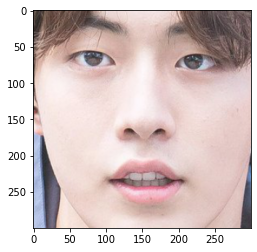

In [17]:
image_path = os.getenv('HOME')+'/aiffel/celebrity/남주혁.jpg'

cropped_face1 = get_gropped_face(image_path)
plt.imshow(cropped_face1)

img_nam = cv2.resize(cropped_face1, (300, 300)) # 512x301의 크기로 Resize
img_nam_rgb = cv2.cvtColor(img_nam, cv2.COLOR_BGR2RGB)
img_show = img_nam_rgb.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_nam)
plt.show()

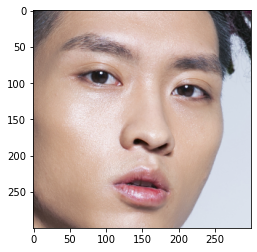

In [18]:
image_path = os.getenv('HOME')+'/aiffel/celebrity/씨잼.jpg'

cropped_face2 = get_gropped_face(image_path)

img_cz = cv2.resize(cropped_face2, (300, 300))    # 512x301의 크기로 Resize
img_cz_rgb = cv2.cvtColor(img_cz, cv2.COLOR_BGR2RGB)
img_show = img_cz_rgb.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_cz)
plt.show()

두 사진을 합쳐보았다...

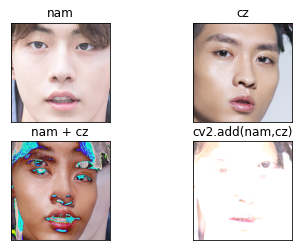

In [19]:
## 단순히 더해주는 로직. 이에 화소가 고르지 못하고 중간중간 이상한 색을 띌 수 있음
## >> 255를 초과하는 영역
nam_cz = img_nam_rgb + img_cz_rgb 

## 전체적으로 하얀 픽셀을 많이 가져감
nam_cz2 = cv2.add(img_nam_rgb,img_cz_rgb)

imgs = {'nam' : img_nam_rgb, 'cz' : img_cz_rgb, 
		'nam + cz' : nam_cz, 'cv2.add(nam,cz)' : nam_cz2}

for i, (k,v) in enumerate(imgs.items()):
	plt.subplot(2,2,i+1)
	plt.imshow(v[:,:,::-1])
	plt.title(k)
	plt.xticks([]); plt.yticks([])
plt.show()

In [20]:
# os.getenv('HOME')+'/aiffel/celebrity/남주혁.jpg'
# os.getenv('HOME')+'/aiffel/celebrity/씨잼.jpg'

In [21]:
# alpha = 0.5
# dst = cv2.addWeighted(img_nam_rgb, alpha, img_cz_rgb , (1-alpha), 0)
# cv2.imshow('cv2.addWeighted', dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [22]:
win_name = 'Alpha blending'     # 창 이름
trackbar_name = 'fade'          # 트렉바 이름

# ---1 트렉바 이벤트 핸들러 함수
def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img_nam_rgb, 1-alpha, img_cz_rgb, alpha, 0) 
    cv2.imshow(win_name, dst)

# ---2 이미지 표시 및 트렉바 붙이기
cv2.imshow(win_name, img_nam_rgb)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()

Opencv를 사용해서 남주혁 사진에서 씨잼 사진으로 점점 바뀌어 가는 모습을 출력했다.

* 주피터 노트북에서는 새로운 화면이 잘 뜨지만... github에는 잘 작동하지 않아서 gif 첨부로 대체하겠다.

[남주혁에서 씨잼으로...](https://github.com/IsaacTips/AIFFEL/blob/master/Exploration/E7_Celebrity_looks_like_me/final.gif)

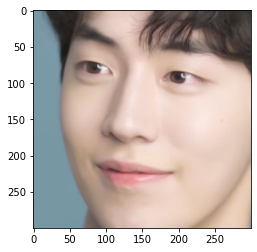

In [23]:
image_path = os.getenv('HOME')+'/aiffel/celebrity/남주혁2.png'

cropped_face1 = get_gropped_face(image_path)
plt.imshow(cropped_face1)

img_nam2 = cv2.resize(cropped_face1, (300, 300)) # 512x301의 크기로 Resize
img_nam2_rgb = cv2.cvtColor(img_nam2, cv2.COLOR_BGR2RGB)
img_show = img_nam2_rgb.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_nam2)
plt.show()

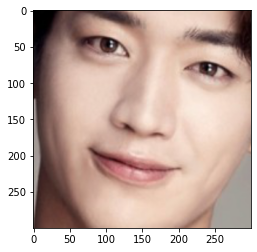

In [24]:
image_path = os.getenv('HOME')+'/aiffel/celebrity/서강준.jpg'

cropped_face2 = get_gropped_face(image_path)

img_seo = cv2.resize(cropped_face2, (300, 300))    # 512x301의 크기로 Resize
img_seo_rgb = cv2.cvtColor(img_seo, cv2.COLOR_BGR2RGB)
img_show = img_seo_rgb.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_seo)
plt.show()

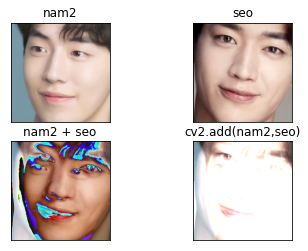

In [25]:
## 단순히 더해주는 로직. 이에 화소가 고르지 못하고 중간중간 이상한 색을 띌 수 있음
## >> 255를 초과하는 영역
nam2_seo = img_nam2_rgb + img_seo_rgb 

## 전체적으로 하얀 픽셀을 많이 가져감
nam_seo2 = cv2.add(img_nam2_rgb,img_seo_rgb)

imgs2 = {'nam2' : img_nam2_rgb, 'seo' : img_seo_rgb, 
		'nam2 + seo' : nam2_seo, 'cv2.add(nam2,seo)' : nam_seo2}

for i, (k,v) in enumerate(imgs2.items()):
	plt.subplot(2,2,i+1)
	plt.imshow(v[:,:,::-1])
	plt.title(k)
	plt.xticks([]); plt.yticks([])
plt.show()

In [26]:
win_name = 'Alpha blending'     # 창 이름
trackbar_name = 'fade'          # 트렉바 이름

# ---1 트렉바 이벤트 핸들러 함수
def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img_nam2_rgb, 1-alpha, img_seo_rgb, alpha, 0) 
    cv2.imshow(win_name, dst)

# ---2 이미지 표시 및 트렉바 붙이기
cv2.imshow(win_name, img_nam2_rgb)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()

## 루브릭
1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.
    - 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.
    
__얼굴 임베딩 벡터를 활용해서 배우 남주혁과 닮은 연예인 top-20을 출력했다__

2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.
    - 다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.
    
__285개의 이미지를 활용해서 0.5이내로 닮은 연예인을 찾아냈다.__

3. 다양하고 재미있는 결과 시각화를 시도하였다.
    - matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.
    
__Opencv를 활용해서 시각화를 하였다.__

## 느낀점
1. 얼굴 임베딩 벡터를 활용하는 방법을 학습하였다.
2. 이미지 데이터를 잘 수집해서 좋은 모델이 나온것 같다.
3. 시각화를 시도하는게 좀 어려웠다. 처음에는 matplolib로 사진을 합치려고 하였으나 쉽지 않아서 구글링을 통해 Opencv를 활용하였다. 그러나 화면출력에 애를 먹었고, 결국 마크다운 링크 첨부로 해결해냈다.